In [15]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
from dqn_acrobot import Net, ReplayMemory, Transition, select_action, to_tensor, train
import gym
import matplotlib.pyplot as plt
from acrobot import AcrobotEnv
import numpy as np
from tqdm import tqdm, trange
from collections import namedtuple
import random
import seaborn as sns

In [2]:
env = AcrobotEnv()
# Initialize replay memory
memory  = ReplayMemory(10000)

# Initialize action-value function Q
net = Net()

# initialize target action-value function Q'
clone = Net()
clone.load_state_dict(net.state_dict())
clone.eval()

optimizer = torch.optim.RMSprop(net.parameters())

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: Could not seed environment <AcrobotEnv instance>


In [3]:
net = torch.load("original.pth")
clone = torch.load("target.pth")

# Test

In [28]:
state = env.reset()
rewards_ = []
for i in tqdm(range(1000)):
    action = select_action(to_tensor(state))
    state, reward, done, _ = env.step(action.item())
    if done:
        break
        print("TERMINAL")
    env.render()
    rewards_.append(reward)

 84%|████████▍ | 845/1000 [00:04<00:00, 426.68it/s]


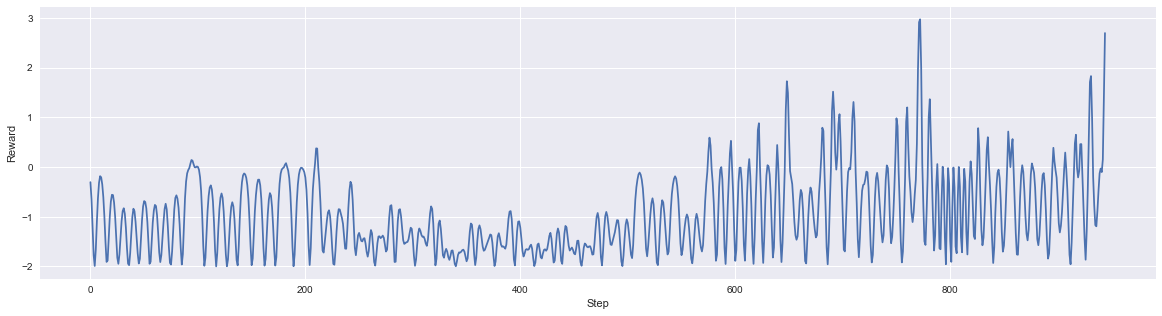

In [29]:
plt.figure(figsize=(20, 5))
plt.xlabel("Step")
plt.ylabel("Reward")
plt.plot(rewards_)
plt.show()  

# Train

In [30]:
trjectories, rewards = train(env, net, clone, memory, num_episodes=50, is_save=True)

## Rewards

Average reward per episode

Text(0.5,0,'Episode')

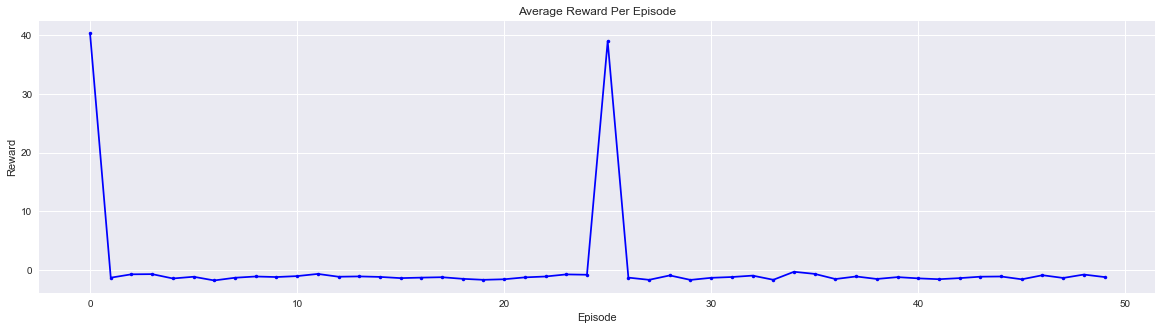

In [41]:
average_reward_per_episode = [float(sum(rewards[i])/len(rewards[i])) for i in rewards.keys()]
plt.figure(figsize=(20, 5))
plt.plot(average_reward_per_episode, 'b')
plt.plot(average_reward_per_episode, 'b.')
plt.ylabel('Reward')
plt.title('Average Reward Per Episode')
plt.xlabel('Episode')

Reward per step in an episode

Text(0.5,1,'Reward per step')

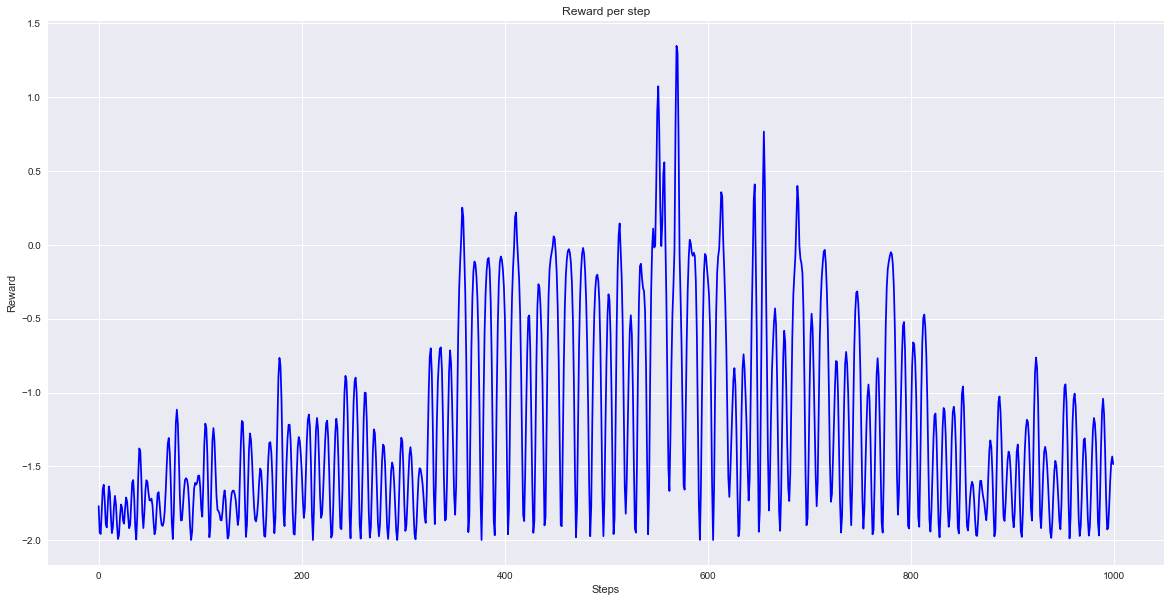

In [40]:
plt.figure(figsize=(20, 10))
plt.plot(rewards[49], 'b')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Reward per step')

## Trajectories

Text(0.5,0,'Iterations')

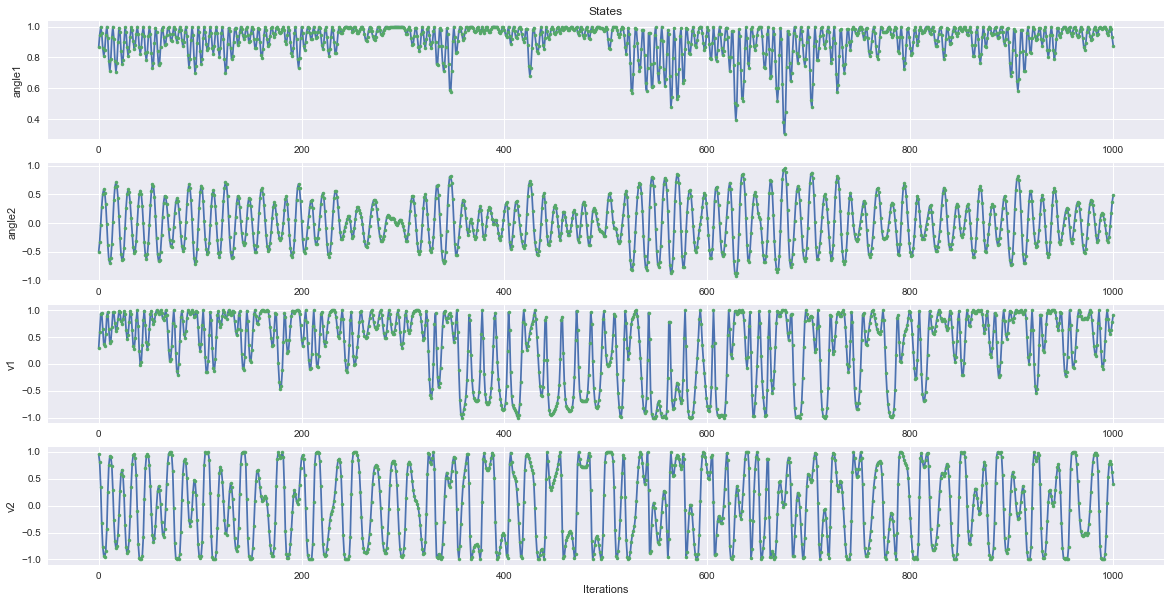

In [47]:
plt.figure(figsize=(20, 10))
plt.subplot(411)
plt.plot(np.transpose(trjectories[49])[0])
plt.plot(np.transpose(trjectories[49])[0], '.')
plt.ylabel(r'angle1')
plt.title('States')
plt.subplot(412)
plt.plot(np.transpose(trjectories[49])[1])
plt.plot(np.transpose(trjectories[49])[1], '.')
plt.ylabel(r'angle2')
plt.subplot(413)
plt.plot(np.transpose(trjectories[49])[2])
plt.plot(np.transpose(trjectories[49])[2], '.')
plt.ylabel(r'v1')
plt.subplot(414)
plt.plot(np.transpose(trjectories[49])[3])
plt.plot(np.transpose(trjectories[49])[3], '.')
plt.ylabel(r'v2')
plt.xlabel('Iterations')